# Eligiliblity for a loan 

## 1. Problem definition
* By observing the pattern we have to design a model which predict the eligilibilty for loan
## 2. Data 
* Source for this dataset is kaggle
## 3.Evaluation
* if this model is able to reach 95% it would be best to launch
## 4. Features
**Here are the features which would became input for prediction output**
* 'Loan_ID'
* 'Gender'
* 'Married'
* 'Dependents'
* 'Education'
* 'Self_Employed'
* 'ApplicantIncome'
* 'CoapplicantIncome'
* 'LoanAmount'
* 'Loan_Amount_Term'
* 'Credit_History'
* 'Property_Area'

In [81]:
#Some import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Data and try EDA 

In [82]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
pd.crosstab(df['Gender'],df['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [85]:
#Comapring thw ratios
female=(75/(37+75))
male=(339/(150+339))
print('Female : ',female ,'and Male : ', male)

Female :  0.6696428571428571 and Male :  0.6932515337423313


* When we Compare the ratio of male female we come to know that there is alomost no effect of Gender on the Loan Status hence both ratios are almost equal

In [86]:
#Chance of loan on the number of dependents
pd.crosstab(df['Dependents'],df['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


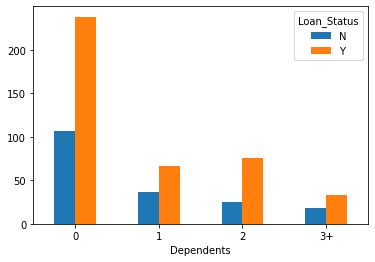

<Figure size 1440x720 with 0 Axes>

In [87]:
g=pd.crosstab(df['Dependents'],df['Loan_Status'])
g.plot.bar()
plt.xticks(rotation=0)
fig=plt.figure(figsize=(20,10));

In [88]:
print(f"0: {238/(238+107)}\n1: {66/(66+36)}\n2: {76/(76+25)}\n3+ : {33/(33+18)}")

0: 0.6898550724637681
1: 0.6470588235294118
2: 0.7524752475247525
3+ : 0.6470588235294118


No real conclusion is Possible because there could be two possibilities
1. Less dependents more chances (which is quit harder to absorb) [Indirect relation]
2. More number of dependents hence more chances [Direct Relation]

In [117]:
df['Loan_Status'].value_counts()

2    422
1    192
Name: Loan_Status, dtype: int64

In [89]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [90]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Getting Our Data Ready 
-> As we know that For a Machine Learning Dataset, we have to fulfill two necessary conditions
1. NO UNFILLED ENTRY
2. ALL DATA SHOULD BE NUMERIC

-> We are provided with two datasets 1. Train data 2. test data
hence preproccessing for each would be time taking hence we are going to make a preprocessing function for it

In [91]:
def preprocessing (df):
    #Filling Numeric data
    print('Numeric Labels Content Null entries: \n')
    for label , content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum(): 
                print(label)
                df[label] = content.fillna(content.median())
    #Time for String (first change it to Categorial)
    print('String Labels Content Null entries: \n')
    for label,content in df.items():
        if pd.api.types.is_string_dtype(content):
            if content.isna().sum():
                print(label)
    for label , content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype('category').cat.as_ordered()
            df[label]=pd.Categorical(content).codes+1
    return df

In [92]:
df_tmp=preprocessing(df)

Numeric Labels Content Null entries: 

LoanAmount
Loan_Amount_Term
Credit_History
String Labels Content Null entries: 

Gender
Married
Dependents
Self_Employed


In [93]:
#Lets check the dtype
df_tmp.dtypes

Loan_ID                int16
Gender                  int8
Married                 int8
Dependents              int8
Education               int8
Self_Employed           int8
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area           int8
Loan_Status             int8
dtype: object

In [94]:
#Lets split first
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(df_tmp.drop('Loan_Status',axis=1),df_tmp['Loan_Status'],test_size=0.2)
set(df_tmp)-set(x_train)

{'Loan_Status'}

# 5. Modelling
-> Three Models we will use
1. LogisticRegression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

### LogisticRegression 

In [95]:
models_score={}
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
r_model_base=LogisticRegression()
r_model_base.fit(x_train,y_train)
models_score['LogisticRegression']=r_model_base.score(x_test,y_test)

C:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbours Classifier

In [96]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
k_model_base=KNeighborsClassifier()
k_model_base.fit(x_train,y_train)
models_score['KNeighborsClassifier']=k_model_base.score(x_test,y_test)

### Random Forest Classifier 

In [97]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
f_model_base=RandomForestClassifier()
f_model_base.fit(x_train,y_train)
models_score['RandomForestClassifier']=f_model_base.score(x_test,y_test)

In [98]:
models_score

{'LogisticRegression': 0.6747967479674797,
 'KNeighborsClassifier': 0.6178861788617886,
 'RandomForestClassifier': 0.7723577235772358}

## Lets have a look on the following:
* Hyperparameter tuning
* Feature importance 
* Confusion matrix
* cross_val_score
* Precision
* recall
* F1
* Classification report
* ROC curve
* Area Under the Curve (AUC)
### Hyperparameter tuning

In [99]:
r_model=LogisticRegression()
r_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [1]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
r_model_grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                "max_iter": [40],
                'verbose' : [0,1,2],
                'n_jobs' : [-1,4]            
             }
r_model=GridSearchCV(estimator=LogisticRegression(),
                    param_grid=r_model_grid,
                    verbose=True,
                    cv=5)
r_model.fit(x_train,y_train)

In [101]:
new_Score={}
r_model.best_params_

{'max_iter': 40,
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'liblinear',
 'verbose': 0}

In [102]:
#logistic
r_model.score(x_test,y_test)

0.7886178861788617

In [103]:
new_Score['LogisticRegression']=r_model.score(x_test,y_test)
models_score

{'LogisticRegression': 0.6747967479674797,
 'KNeighborsClassifier': 0.6178861788617886,
 'RandomForestClassifier': 0.7723577235772358}

(67% to 78%)

In [104]:
k_model=KNeighborsClassifier()
k_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
np.random.seed(42)
k_model_grid={'n_neighbors': [4,5,6,10],
              'weights':['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'n_jobs' : [-1],
              'leaf_size':[30,40,20,50]
             }
k_model=GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid=k_model_grid,
                     verbose=True,
                     cv=5
                    )
k_model.fit(x_train,y_train);

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [64]:
k_model.score(x_test,y_test)

0.5853658536585366

In [65]:
new_Score['KNeighborsClassifier']=k_model.score(x_test,y_test)
models_score

{'LogisticRegression': 0.7886178861788617,
 'KNeighborsClassifier': 0.6178861788617886,
 'RandomForestClassifier': 0.7642276422764228}

**Not Much change** 

# RandomForestClassifier

In [28]:
f_model_grid={'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth' : [None,5,15,3],
              'min_samples_split' :[2,9,15],
              'min_samples_leaf' : [1,7,12],
              'max_features' : ['sqrt', 'log2', None],
              'n_jobs':[-1],
              'class_weight':['balanced', 'balanced_subsample']
             } # 'n_estimators' (we will try it with looping)
f_model=GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=f_model_grid,
                      verbose=True,
                     cv=5)
f_model.fit(x_train,y_train);

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [29]:
f_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 15,
 'n_jobs': -1}

In [30]:
f_model.score(x_test,y_test)

0.7886178861788617

Not Much improvement lets move for n_estimator

In [31]:
np.random.seed(42)
for i in range(1,200,2):
    random=RandomForestClassifier(n_estimators=i,class_weight='balanced',criterion='log_loss',max_depth=3,
                                 max_features='log2',min_samples_leaf=1,min_samples_split=2,n_jobs=-1)
    random.fit(x_train,y_train)
    print(f"for n_estimator {i} accuracy = {random.score(x_test,y_test)*100:0.2f}")

for n_estimator 1 accuracy = 79.67
for n_estimator 3 accuracy = 74.80
for n_estimator 5 accuracy = 56.91
for n_estimator 7 accuracy = 76.42
for n_estimator 9 accuracy = 66.67
for n_estimator 11 accuracy = 76.42
for n_estimator 13 accuracy = 76.42
for n_estimator 15 accuracy = 77.24
for n_estimator 17 accuracy = 78.05
for n_estimator 19 accuracy = 78.86
for n_estimator 21 accuracy = 79.67
for n_estimator 23 accuracy = 79.67
for n_estimator 25 accuracy = 77.24
for n_estimator 27 accuracy = 75.61
for n_estimator 29 accuracy = 79.67
for n_estimator 31 accuracy = 77.24
for n_estimator 33 accuracy = 77.24
for n_estimator 35 accuracy = 77.24
for n_estimator 37 accuracy = 78.86
for n_estimator 39 accuracy = 78.86
for n_estimator 41 accuracy = 78.86
for n_estimator 43 accuracy = 77.24
for n_estimator 45 accuracy = 78.86
for n_estimator 47 accuracy = 78.86
for n_estimator 49 accuracy = 80.49
for n_estimator 51 accuracy = 73.17
for n_estimator 53 accuracy = 80.49
for n_estimator 55 accuracy = 78.

at n=49 -> 80.49%
Not Much score lets try for another 3 Models
### GradientBoostingClassifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
g_model_base=GradientBoostingClassifier()
g_model_base.fit(x_train,y_train)
models_score['GradientBoostingClassifier']=g_model_base.score(x_test,y_test)

### SVC

In [106]:
from sklearn.svm import SVC
s_model_base=SVC()
s_model_base.fit(x_train,y_train)
models_score['SVC']=s_model_base.score(x_test,y_test)

### GaussianNB 

In [107]:
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
gu_model_base=GaussianNB()
gu_model_base.fit(x_train,y_train)
models_score['GaussianNB']=gu_model_base.score(x_test,y_test)

In [108]:
models_score

{'LogisticRegression': 0.6747967479674797,
 'KNeighborsClassifier': 0.6178861788617886,
 'RandomForestClassifier': 0.7723577235772358,
 'GradientBoostingClassifier': 0.7642276422764228,
 'SVC': 0.6504065040650406,
 'GaussianNB': 0.7886178861788617}

We will move with Logistic Regression
### Feature Importance

In [109]:
gu_model_base.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [110]:
np.random.seed(42)
f=f_model_base.feature_importances_

In [40]:
def plot_features(columns,importance):
    df=(pd.DataFrame({'features':columns,'feature_importance':importance}).sort_values('feature_importance',ascending=True)
        .reset_index(drop=True))
    fig,ax=plt.subplots(figsize=(10,6))
    ax.barh(df['features'],df['feature_importance'])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')

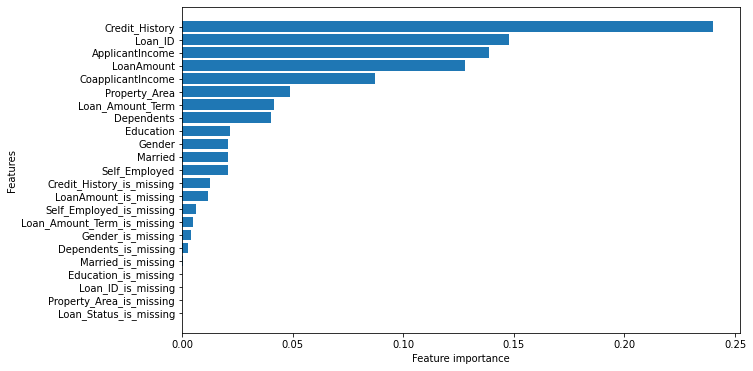

In [41]:
plot_features(x_train.columns,f)

In [111]:
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
np.random.seed(42)
def evaluate(y_test,y_pred,pred):
    #confusion matrix
    print('confusion matrix\n',confusion_matrix(y_test,y_pred))
    print('classification Report\n',classification_report(y_test,y_pred))
    print('accuracy score\n',accuracy_score(y_test,y_pred))
evaluate(y_test,r_model.predict(x_test),r_model.predict_proba(x_test))

confusion matrix
 [[18 25]
 [ 1 79]]
classification Report
               precision    recall  f1-score   support

           1       0.95      0.42      0.58        43
           2       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

accuracy score
 0.7886178861788617


In [112]:
#lets add the loan_status column in test data set
t=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
t.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [113]:
t_tmp=preprocessing(t)

Numeric Labels Content Null entries: 

LoanAmount
Loan_Amount_Term
Credit_History
String Labels Content Null entries: 

Gender
Dependents
Self_Employed


In [114]:
y_t=r_model_base.predict(t_tmp)
y_t

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [119]:
t['Loan_Status']=y_t

In [120]:
t['Loan_Status']

0      2
1      2
2      2
3      2
4      2
      ..
362    2
363    2
364    2
365    2
366    2
Name: Loan_Status, Length: 367, dtype: int8